In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("G:/data sceince/Cars New.csv")

In [3]:
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
# Appying Feature engineering in order to see which columns are important 

In [ ]:
# Applying Univariate feature selection

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [18]:
array = data.values

In [19]:
x = array[:,[0,2,3,4]]
x

array([[ 49.        ,  89.        , 104.1853528 ,  28.7620589 ],
       [ 55.        ,  92.        , 105.4612635 ,  30.46683298],
       [ 55.        ,  92.        , 105.4612635 ,  30.19359657],
       [ 70.        ,  92.        , 113.4612635 ,  30.63211391],
       [ 53.        ,  92.        , 104.4612635 ,  29.88914864],
       [ 70.        ,  89.        , 113.1853528 ,  29.59176832],
       [ 55.        ,  92.        , 105.4612635 ,  30.30847957],
       [ 62.        ,  50.        , 102.5985128 ,  15.84775807],
       [ 62.        ,  50.        , 102.5985128 ,  16.35948352],
       [ 80.        ,  94.        , 115.6452041 ,  30.92015417],
       [ 73.        ,  89.        , 111.1853528 ,  29.36334142],
       [ 92.        ,  50.        , 117.5985128 ,  15.75353468],
       [ 92.        ,  99.        , 122.1050553 ,  32.81359241],
       [ 73.        ,  89.        , 111.1853528 ,  29.3784363 ],
       [ 66.        ,  89.        , 108.1853528 ,  29.34727902],
       [ 73.        ,  89

In [20]:
y = array[:,1]

In [23]:
# sklearn works better with int values rather than float so converting y to int

y = y.astype('int')

In [32]:
test = SelectKBest(score_func = f_regression, k = 'all')

In [33]:
fit = test.fit(x,y)

In [34]:
features = fit.transform(x)

In [36]:
from numpy import set_printoptions

In [37]:
set_printoptions(precision = 3)

In [38]:
print(fit.scores_)

[88.193 30.824 71.431 30.449]


Inference : From these scores we can see that wt has the lowest chi2 value and it can be neglected

In [49]:
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [50]:
import seaborn as sns

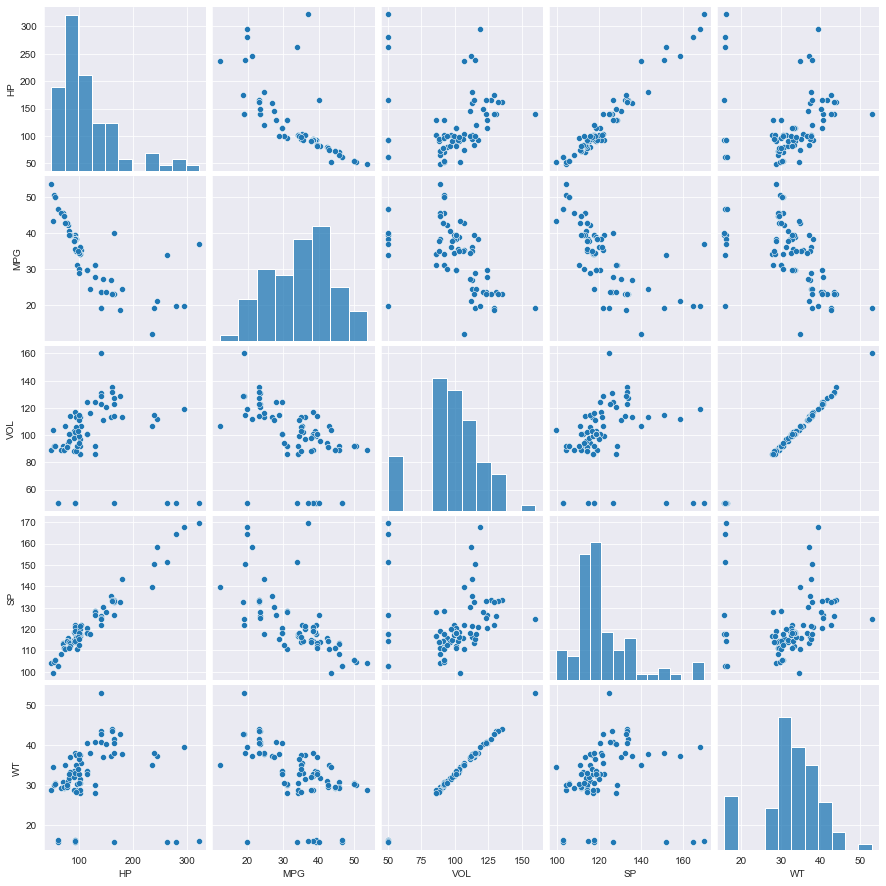

In [51]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

# preparing a model

In [52]:
import statsmodels.formula.api as smf

In [53]:
model1 = smf.ols("MPG~HP+VOL+SP+WT",data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.54e-23
Time:                        19:40:05   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# As we come to know that there is a problwm with volume and weight after seeing their p values now we will consider only VOL and will build the simple linear regression model and we will check whether the r squared value improves or not. 


#Simple Linear regression model 

In [55]:
modelv = smf.ols('MPG~VOL',data=data).fit()
modelv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           3.82e-07
Time:                        19:40:12   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
modelw = smf.ols('MPG~WT',data=data).fit()
modelw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           4.38e-07
Time:                        19:40:13   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
modelvw = smf.ols('MPG~VOL+WT',data=data).fit()
modelvw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           2.43e-06
Time:                        19:40:14   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Calculating VIF values to check the correlation 

In [58]:
r_hp = smf.ols('HP~VOL+WT+SP',data=data).fit().rsquared
v_hp = 1/(1-r_hp)

r_sp = smf.ols('SP~VOL+WT+HP',data=data).fit().rsquared
v_sp = 1/(1-r_sp)

r_vol = smf.ols('VOL~SP+WT+HP',data=data).fit().rsquared
v_vol = 1/(1-r_vol)

r_wt = smf.ols('WT~VOL+SP+HP',data=data).fit().rsquared
v_wt = 1/(1-r_wt)

In [59]:
d1 = {'Variables':['HP','SP','VOL','WT'], 'VIF':[v_hp,v_sp,v_vol,v_wt]}
v_frame = pd.DataFrame(d1)
v_frame

,Variables,VIF
0,HP,19.926589
1,SP,20.007639
2,VOL,638.806084
3,WT,639.533818


In [60]:
import statsmodels.api as smf

In [61]:
modelr = model1.resid
modelr



0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Length: 81, dtype: float64

# Residual for testing Normality

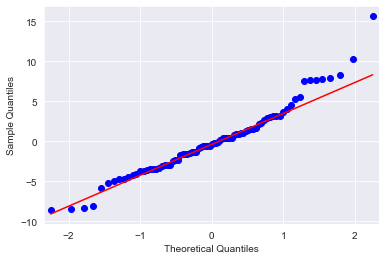

In [62]:
qq_plot= smf.qqplot(modelr,line='q')

In [63]:
list(np.where(model1.resid>10))

[array([ 0, 76], dtype=int64)]

# Residuals for testing constant variance

In [64]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

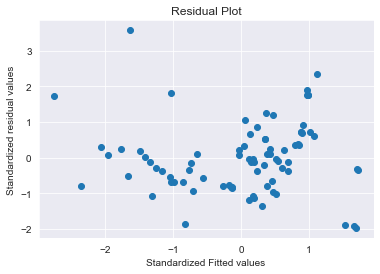

In [65]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residuals vs regressors

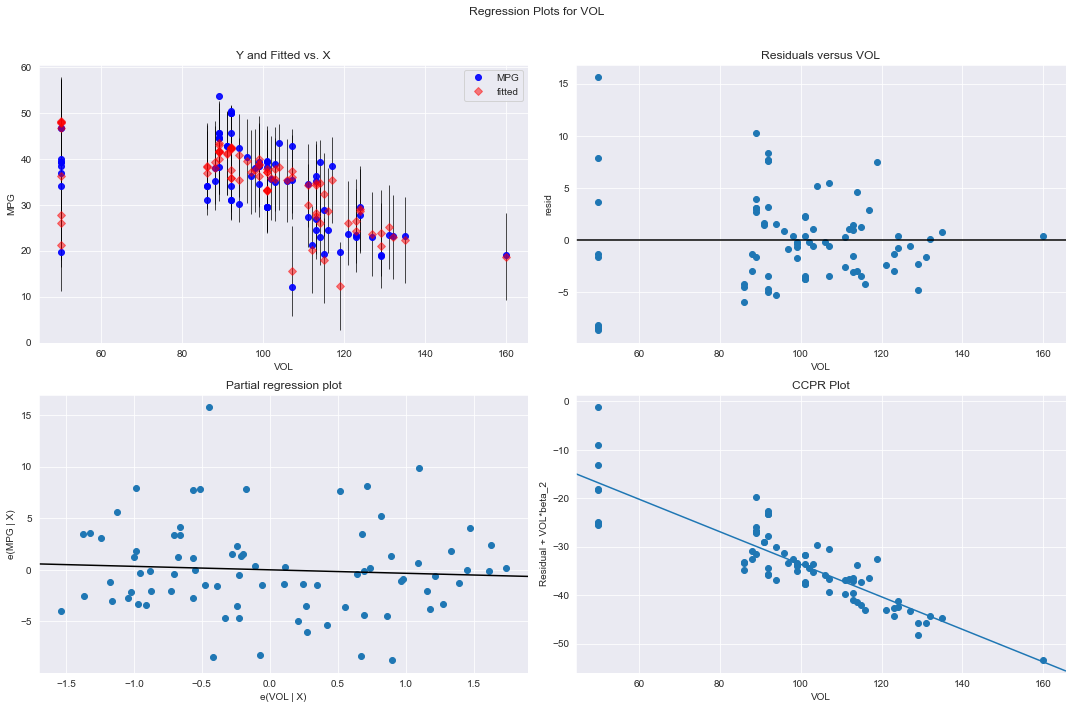

In [68]:
fig = plt.figure(figsize=[15,10])
fig = smf.graphics.plot_regress_exog(model1, "VOL",fig=fig)

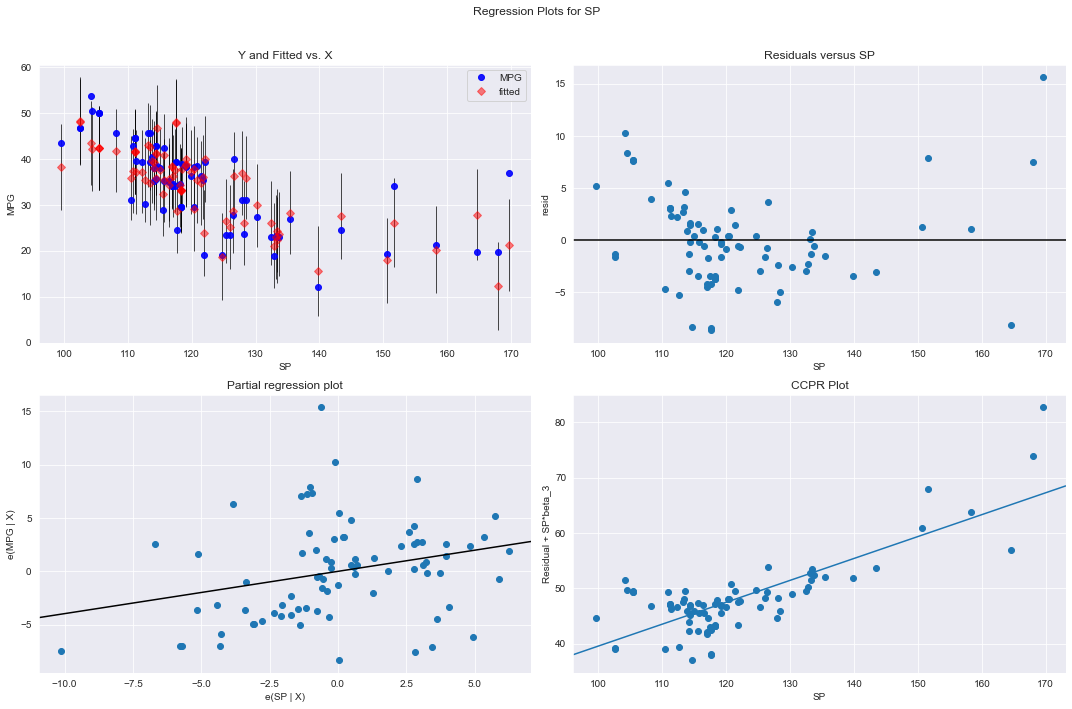

In [70]:
fig = plt.figure(figsize=[15,10])
fig = smf.graphics.plot_regress_exog(model1, "SP",fig=fig)

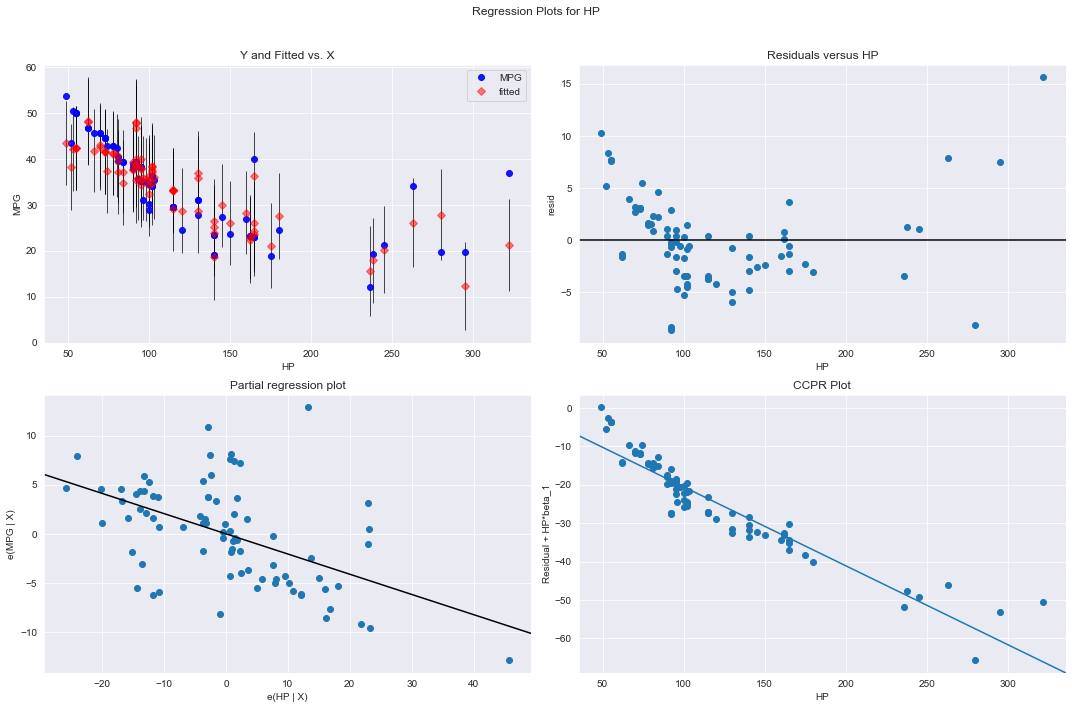

In [71]:
fig = plt.figure(figsize=[15,10])
fig = smf.graphics.plot_regress_exog(model1, "HP",fig=fig)

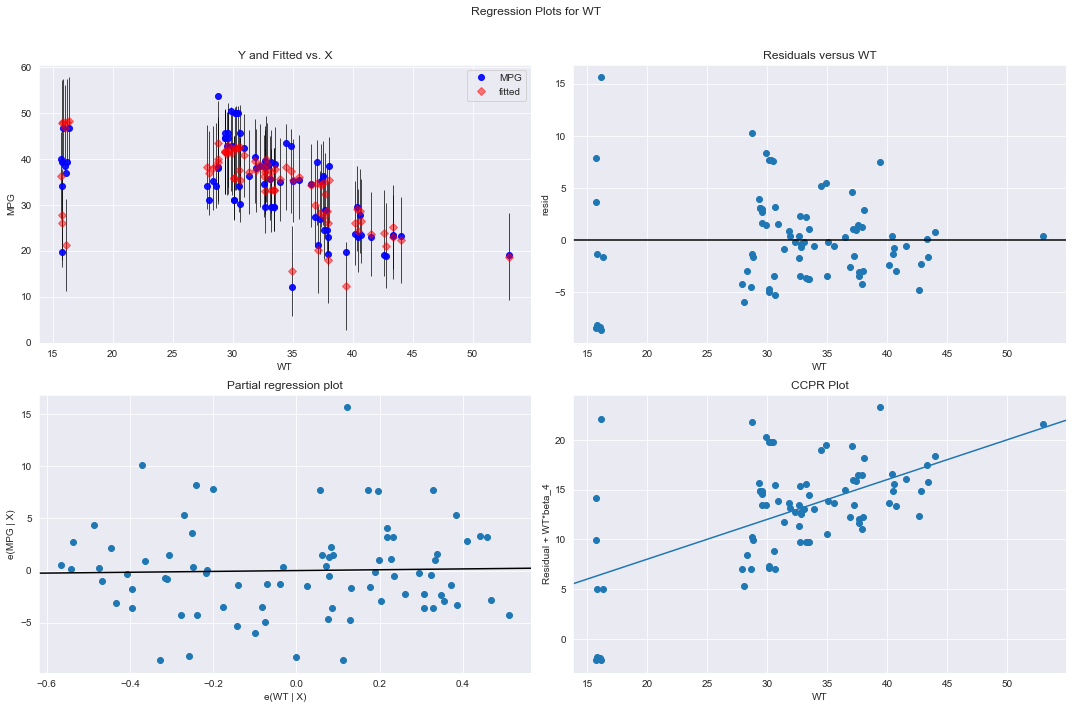

In [72]:
fig = plt.figure(figsize=[15,10])
fig = smf.graphics.plot_regress_exog(model1, "WT",fig=fig)

# Model deletion diagnostics

In [73]:
# Cooks distance, with the help of cook's distance we will delete the outliers

In [77]:
model_influence = model1.get_influence()
(c,_) = model_influence.cooks_distance

In [78]:
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

Text(0, 0.5, 'Cooks Distance')

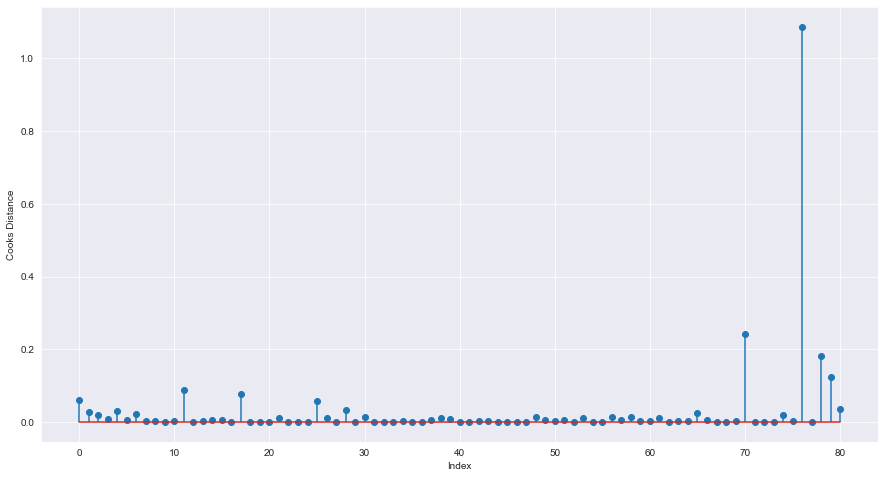

In [82]:
fig = plt.figure(figsize=[15,8])
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel("Index")
plt.ylabel("Cooks Distance")

In [83]:
np.argmax(c),np.max(c)

(76, 1.086519399817991)

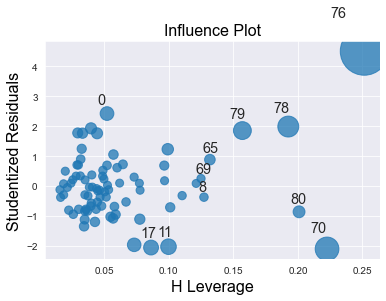

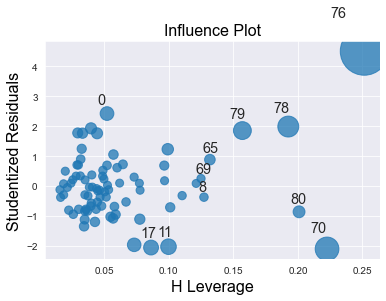

In [86]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)

In [87]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = (3*(k+1)/n)

In [88]:
leverage_cutoff

0.2222222222222222

In [89]:
data[data.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [91]:
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [92]:
data_new = data.drop(data.index[[70,76]], axis = 0).reset_index()

In [93]:
data_new

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [96]:
data_new1 = data_new.drop(['index'],axis = 1)

In [97]:
data_new1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


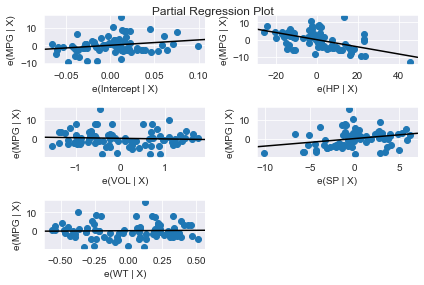

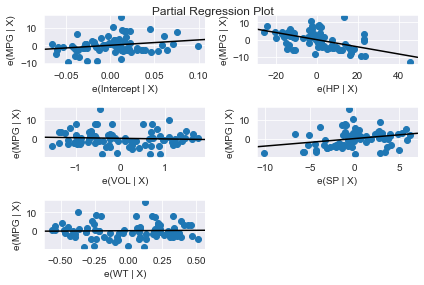

In [99]:
smf.graphics.plot_partregress_grid(model1)

# Final model

In [106]:
import statsmodels.formula.api as smf
Final_V = smf.ols('MPG~HP+VOL+SP',data = data_new1).fit()
Final_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     111.0
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.65e-27
Time:                        20:29:21   Log-Likelihood:                -219.06
No. Observations:                  79   AIC:                             446.1
Df Residuals:                      75   BIC:                             455.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5275     13.051      1.956      0.054      -0.471      51.526
HP            -0.2291      0.035     -6.592      0.000      -0.298      -0.160
VOL           -0.1825      0.023     -8.012      0.000      -0.228      -0.137
SP             0.4415      0.141      3.124      0.003       0.160       0.723
==============================================================================
Omnibus:                        6.541   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.833
Skew:                           0.620   Prob(JB):                       0.0541
Kurtosis:                       3.485   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
import statsmodels.formula.api as smf
Final_W = smf.ols('MPG~HP+WT+SP',data = data_new1).fit()
Final_W.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     110.9
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           1.70e-27
Time:                        20:29:24   Log-Likelihood:                -219.09
No. Observations:                  79   AIC:                             446.2
Df Residuals:                      75   BIC:                             455.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.4276     13.060      1.870      0.065      -1.590      50.445
HP            -0.2309      0.035     -6.639      0.000      -0.300      -0.162
WT            -0.5437      0.068     -8.004      0.000      -0.679      -0.408
SP             0.4490      0.142      3.173      0.002       0.167       0.731
==============================================================================
Omnibus:                        6.300   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.582
Skew:                           0.610   Prob(JB):                       0.0613
Kurtosis:                       3.458   Cond. No.                     5.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
Model_Final_V = Final_V.get_influence()
(c_v,_)=Model_Final_V.cooks_distance

<StemContainer object of 3 artists>

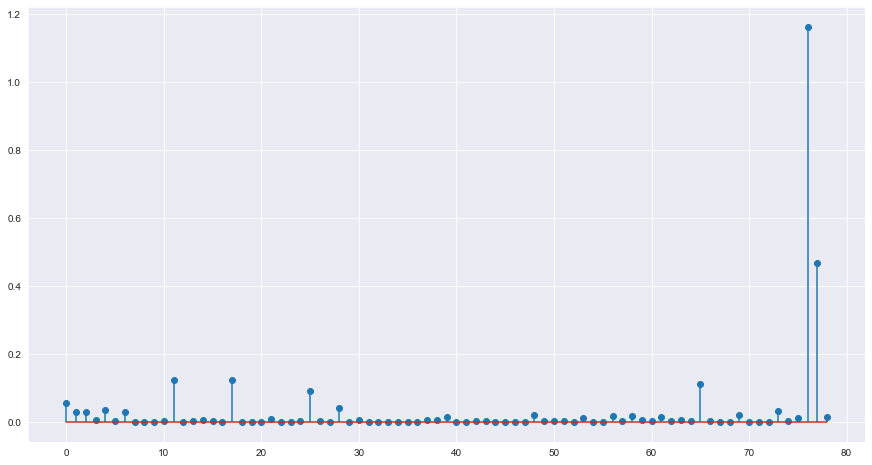

In [111]:
plt.figure(figsize=(15,8))
plt.stem(np.arange(len(data_new1)),np.round(c_v,3))

In [125]:
np.argmax(c_v),np.max(c_v)

(76, 1.1629387469135064)

In [117]:
data_new2 = data_new1.drop(data_new1.index[[76,77]],axis=0).reset_index()

In [115]:
data_new2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [118]:
import statsmodels.formula.api as smf
Final_V2 = smf.ols('MPG~HP+VOL+SP',data = data_new2).fit()
Final_V2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     158.6
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           6.81e-32
Time:                        20:41:21   Log-Likelihood:                -200.71
No. Observations:                  77   AIC:                             409.4
Df Residuals:                      73   BIC:                             418.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.2974     11.336      2.232      0.029       2.706      47.889
HP            -0.2635      0.031     -8.634      0.000      -0.324      -0.203
VOL           -0.1362      0.021     -6.366      0.000      -0.179      -0.094
SP             0.4335      0.122      3.560      0.001       0.191       0.676
==============================================================================
Omnibus:                        9.478   Durbin-Watson:                   1.195
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.184
Skew:                           0.770   Prob(JB):                       0.0101
Kurtosis:                       3.703   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
model_influence_V = Final_V2.get_influence()
(c_V, _) = model_influence_V.cooks_distance

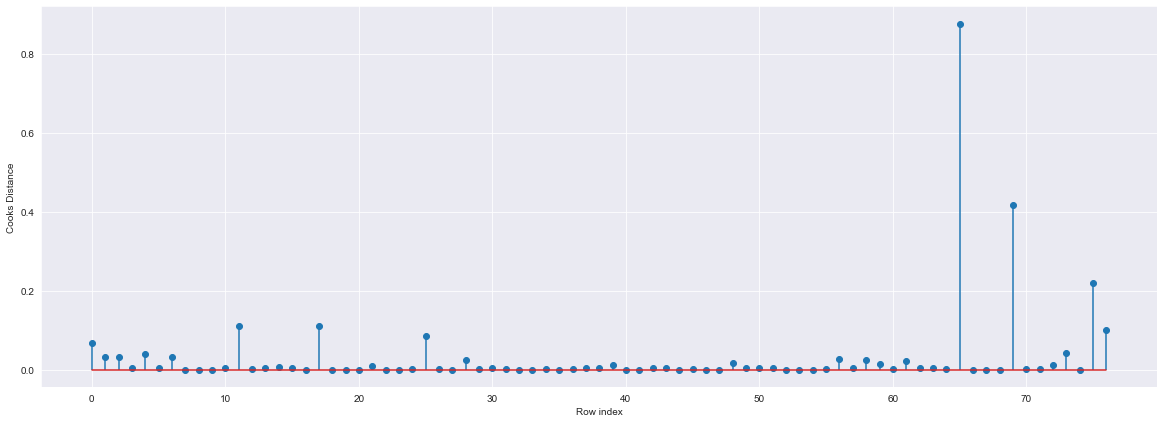

In [121]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data_new2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [126]:
np.argmax(c_V),np.max(c_V)

(65, 0.8774556986296823)

In [130]:
data_new3 = data_new2.drop(data_new2.index[[65]],axis=0).reset_index()

In [131]:
data_new3

,level_0,index,HP,MPG,VOL,SP,WT
0,0,0,49,53.700681,89,104.185353,28.762059
1,1,1,55,50.013401,92,105.461264,30.466833
2,2,2,55,50.013401,92,105.461264,30.193597
3,3,3,70,45.696322,92,113.461264,30.632114
4,4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...,...
71,72,72,140,19.086341,160,124.715241,52.997752
72,73,73,140,19.086341,129,121.864163,42.618698
73,74,74,175,18.762837,129,132.864163,42.778219
74,75,75,238,19.197888,115,150.576579,37.923113


In [132]:
import statsmodels.formula.api as smf
Final_V3 = smf.ols('MPG~HP+VOL+SP',data = data_new3).fit()
Final_V3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     190.2
Date:                Mon, 05 Jul 2021   Prob (F-statistic):           3.87e-34
Time:                        20:48:37   Log-Likelihood:                -191.90
No. Observations:                  76   AIC:                             391.8
Df Residuals:                      72   BIC:                             401.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2567     10.793      1.414      0.162      -6.258      36.772
HP            -0.2970      0.030    -10.055      0.000      -0.356      -0.238
VOL           -0.1048      0.021     -4.887      0.000      -0.148      -0.062
SP             0.5203      0.115      4.538      0.000       0.292       0.749
==============================================================================
Omnibus:                       12.199   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.710
Skew:                           0.941   Prob(JB):                      0.00174
Kurtosis:                       3.685   Cond. No.                     5.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,"WT":35},index=[1])

In [134]:
Final_V3.predict(new_data)

1    46.48671
dtype: float64

In [135]:
y_pred = Final_V3.predict(data)

In [136]:
y_pred

0     45.579291
1     44.146382
2     44.146382
3     43.853072
4     44.220177
        ...    
76     2.608188
77    10.849230
78    10.768568
79     2.534742
80     6.696138
Length: 81, dtype: float64